# Banana Trade Relationships Among Countries

## Christopher Pedersen and Dominic Frerichs
## Professor Aguiar
## MATH1010: Introduction to Networks

## Importing the packages we'll use

In [1]:
# Importing Packages
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import matplotlib.cm as cmx

## Loading in the banana import and export dataset from the FAO

In [2]:
# Loading in the dataset
folder = ""
file = "FAO_Bananas"
ext = ".npy"
FAO_Bananas = np.load( folder+file+ext )

print(FAO_Bananas)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Creating the network from the .npy file

In [3]:
# Creating the Network
FAO_Bananas_G = nx.to_networkx_graph(FAO_Bananas, create_using=nx.DiGraph)

## Context

This network dataset originates from the Food and Agriculture Organization of the United Nations (FAO). The FAO is an agency of the United Nations that leads the effort to defeat hunger worldwide by achieving food security for all. They collect data on the imports and exports of different products between countries, including bananas which we are focusing on today. The data represents banana trade relationships between countries in 2010.

## Basic network attributes

First, we want to verify whether or not the network is directed. To do this, we use the "all_close" function. Because it returns "False", it means the matrix and its transpose are not the same and therefore the network is directed.

In [4]:
np.allclose(FAO_Bananas, FAO_Bananas.T)

False

### Number of nodes in the network?

In [5]:
np.shape(FAO_Bananas)
N = np.shape(FAO_Bananas)[0]
print(N)

214


There are a total 214 nodes in the network, each representing a country in the trade network.

### Number of edges in the network?

In [6]:
print(FAO_Bananas_G.number_of_edges())

1752


There are a total 1,752 edges in the network, representing import and export relationships of bananas among countries.

### Weighted or unweighted?

Our network dataset is weighted. The edges are weighted and represent a certain unit of bananas being imported and exported between countries.

### Connected or disconnected?

Because we found our banana network to be directed above, we will determine strongly connected components.

In [7]:
print(nx.number_strongly_connected_components(FAO_Bananas_G))
print(nx.is_strongly_connected(FAO_Bananas_G))

104
False


These results tell us that the overall network is not strongly connected and has 104 separate strongly connected components.

## Plotting the network

### Customizing our visualization with country labels

In [8]:
# Reading in country names
Names = []
with open('fao_trade_names.txt', 'r') as fd:
    lines = fd.readlines()
    for line in lines:
        name = line.split('\n')[0]
        Names.append(name)

In [9]:
# Creating dictionary
names_dictionary = { i : Names[i] for i in range(0, len(Names) ) }

In [10]:
# Relabeling nodes with country names
FAO_Bananas_G = nx.relabel_nodes(FAO_Bananas_G, names_dictionary)

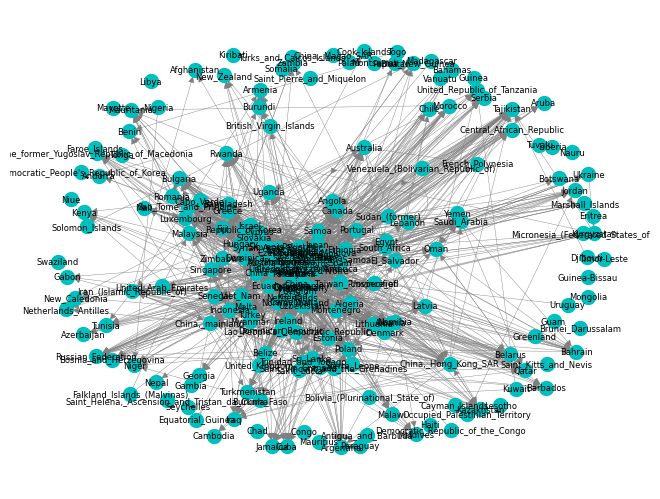

In [11]:
# Positioning and drawing of network (names)
pos_names = nx.spring_layout(FAO_Bananas_G, k=2)

nx.draw(FAO_Bananas_G, pos_names, node_color='c', node_size=100, edge_color='grey', with_labels=True, font_size=6, width=0.3)

## Graph partitioning using the Girvan-Newman algorithm

### Including a helper function for plotting the communities in our network

In [12]:
# Function for plotting communities in the network
def Plot_Comm(Network, C, position = None):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(C)
    color_map = ['k']*N
    for i in range(K):
        for j in range(len(C[i])):
            color_map[ C[i][j] ] = cmap(i/K)
    if position is None:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=100, edge_color='grey', with_labels=True, font_size=6, width=0.3)
    plt.show()
    return

In [13]:
# Helper code for plotting communities with country names
comm = girvan_newman(FAO_Bananas_G)
gn_communities = tuple(sorted(c) for c in next(comm))

def switch_to_numbers(G, C):
    num_comm = len(C)
    a = []
    for c in range(num_comm):
        a.append([0])
    for i, node in enumerate(G.nodes()):
        for j in range(num_comm):
            if node in C[j]:
                a[j].append(i)
    for c in range(num_comm):
        a[c] = a[c][1:]
    return a

### Plotting the communities in the network

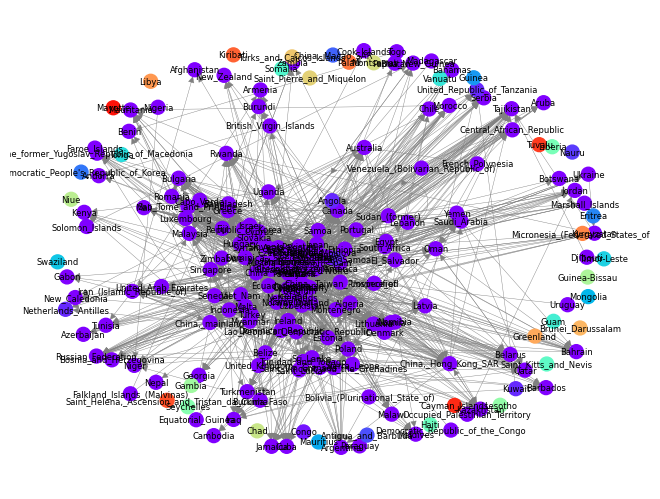

In [14]:
# Plotting network with communites and country names
named_communities = switch_to_numbers(FAO_Bananas_G, gn_communities)

Plot_Comm(FAO_Bananas_G, named_communities, pos_names)

The communities identified by the Girvan-Newman algorithm do make sense given the context of our data. When we look at some of the countries excluded from the largest component of the network, it makes sense that they are not importing or exporting bananas (i.e., North Korea).

## Centrality in the banana network

In [15]:
deg_cen = nx.degree_centrality(FAO_Bananas_G)
close_cen = nx.closeness_centrality(FAO_Bananas_G)
eigen_cen = nx.eigenvector_centrality(FAO_Bananas_G)
betw_cen = nx.betweenness_centrality(FAO_Bananas_G)

print('The country with highest degree centrality is', max(deg_cen, key=lambda key: deg_cen[key]))
print('The country with highest closeness centrality is', max(close_cen, key=lambda key: close_cen[key]))
print('The country with highest eigenvector centrality is', max(eigen_cen, key=lambda key: eigen_cen[key]))
print('The country with highest betweenness centrality is', max(betw_cen, key=lambda key: betw_cen[key]))

The country with highest degree centrality is Germany
The country with highest closeness centrality is China
The country with highest eigenvector centrality is Germany
The country with highest betweenness centrality is Germany


### Centrality Graph (closeness)

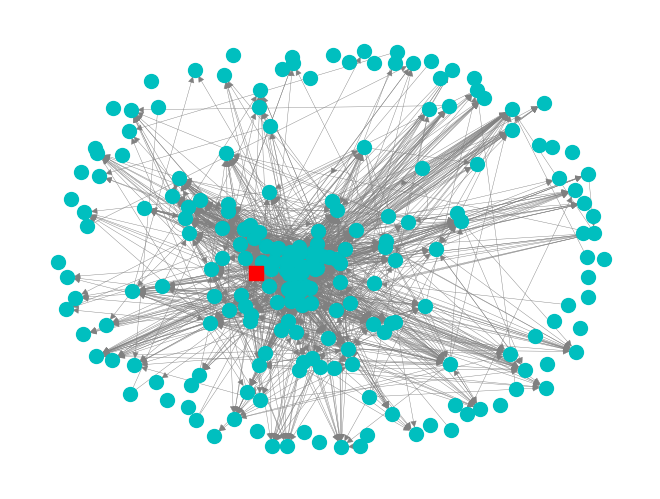

In [16]:
nx.draw(FAO_Bananas_G, pos_names, node_color='c', node_size=100, edge_color='grey', with_labels=False, width=0.3)
nx.draw_networkx_nodes(FAO_Bananas_G, pos_names, node_color = 'red', nodelist = ['China'], label = 'China', node_size=100, node_shape='s')

### Centrality Graph (degree, eigenvenctor, betweenness)

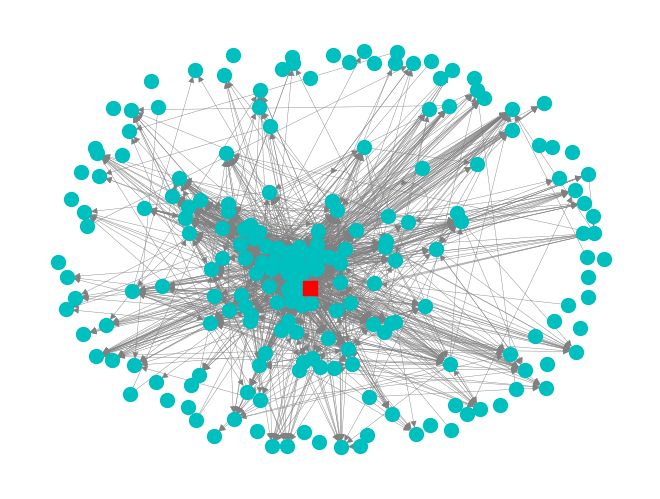

In [17]:
nx.draw(FAO_Bananas_G, pos_names, node_color='c', node_size=100, edge_color='grey', with_labels=False, width=0.3)
nx.draw_networkx_nodes(FAO_Bananas_G, pos_names, node_color = 'red', nodelist = ['Germany'], label = 'Germany', node_size=100, node_shape='s')

### Centrality explanations

Yes, the centrality metrics did identify different nodes as the "most central" node. Germany was identified as having the highest degree, eigenvector, and betweenness centrality while China was identified as having the highest closeness centrality.

Given the nature of the banana trade network, we think that degree centrality is most informative. Degree centrality defines the important nodes to be those that are connected to lots of other nodes. In the context of our network, this means that the country with the highest degree centrality is importing and exporting bananas to the most other countries. This establishes their importance in the network overall.

## Clustering coefficient

In [18]:
clustering = nx.algorithms.clustering(FAO_Bananas_G)
print('The country with lowest clustering coefficient is', min(clustering, key=lambda key: clustering[key]))

average_cc = nx.algorithms.average_clustering(FAO_Bananas_G)
print('The average clustering coefficient for the banana network is ', average_cc)

The country with lowest clustering coefficient is Afghanistan
The average clustering coefficient for the banana network is  0.19276834633257203


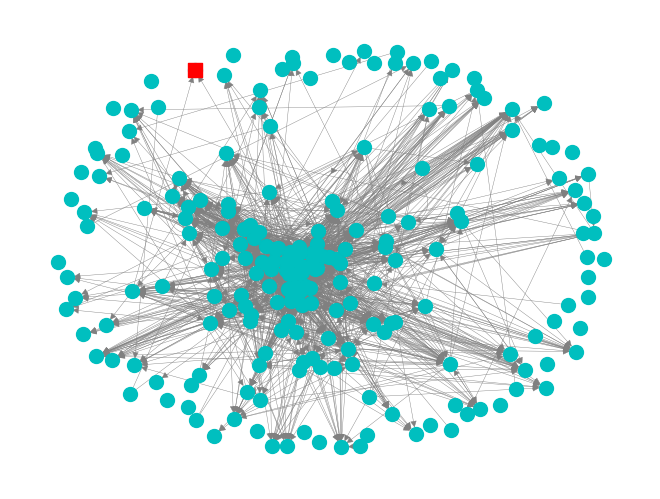

In [19]:
nx.draw(FAO_Bananas_G, pos_names, node_color='c', node_size=100, edge_color='grey', with_labels=False, width=0.3)
nx.draw_networkx_nodes(FAO_Bananas_G, pos_names, node_color = 'red', nodelist = ['Afghanistan'], label = 'Afghanistan', node_size=100, node_shape='s')

These results show that Afghanistan has the lowest probability that any pair of the countries it trades bananas with trade bananas with one another (of the countries connected to other banana trading countries). Furthermore, the average probability for a country in the network having any pair of trading partners who trade with one another is 19.28%.

## Degree Distribution

### In-Degree

<BarContainer object of 37 artists>

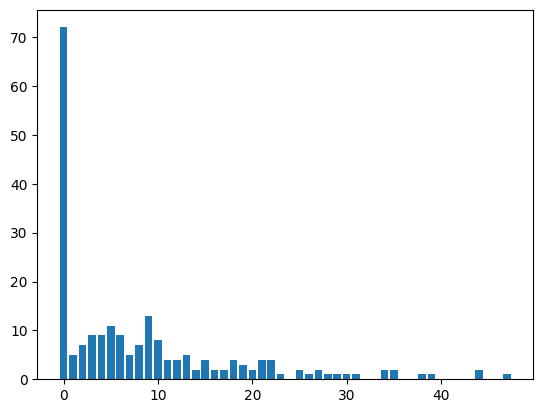

In [20]:
degree_sequence_in = sorted((d for n, d in FAO_Bananas_G.in_degree()), reverse=True)
plt.bar(*np.unique(degree_sequence_in, return_counts=True))

The in-degree of a node is the number of edges pointing to the node from another. In this case, it is the number of countries a country imports bananas from. We can see a right-skew to the graph, suggesting many countries do not import bananas from any other country in the network.

### Out-Degree

<BarContainer object of 43 artists>

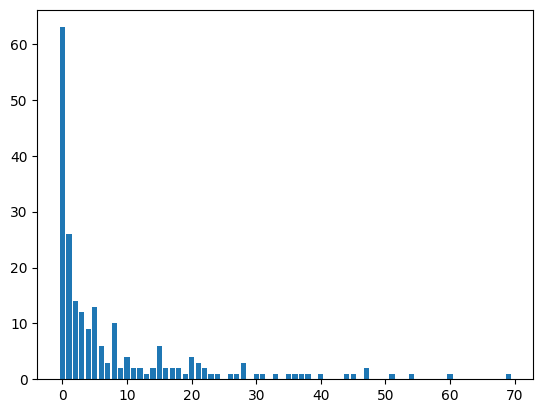

In [21]:
degree_sequence_out = sorted((d for n, d in FAO_Bananas_G.out_degree()), reverse=True)
plt.bar(*np.unique(degree_sequence_out, return_counts=True))

The out-degree of a node is the number of edges pointing from a node to another. In this case, it is the number of countries a country exports bananas to. We can see a right-skew to the graph, suggesting many countries do not export bananas to any other country in the network.

## Conclusion

Before performing an analysis of this dataset, we thought bananas were exported from a select few countries that produced much of the world's supply. Looking at the out-degree graph, we can see that while there are  many countries that do not export bananas, there is a sizeable number of countries that still export a notable amount of bananas themselves. There do not appear to be many countries that completely dominate the banana export business.

Within the network, there are a lot of countries that are not participating in the import or export of bananas. Therefore, we can conclude that these countries either choose/are forced not to import/export, can't afford to import/export, or produce their own bananas. The number of non-participating countries is also much larger than we expected.

In regards to desirable knowledge to better graph the network, we would be interested in including information on trade restrictions between countries that may prevent some countries from participating in the import/export of food products like bananas. This could help explain why there are so many non-participating countries like we mentioned above. In terms of metadata, we would like information on quantities of bananas being transported between countries, whether that be tons, number of bananas, or shipping containers. Furthermore, GDP data per country could be helpful to determine the significance of the banana trade market to a country's economy.

## References

“About FAO.” n.d. Food and Agriculture Organization of the United Nations. Accessed February 1, 2023. http://www.fao.org/about/en/.

De Domenico, Manlio, Vincenzo Nicosia, Alexandre Arenas, and Vito Latora. 2015. “Structural Reducibility of Multilayer Networks.” Nature Communications 6 (1): 6864. https://doi.org/10.1038/ncomms7864.